In [0]:
import tensorflow
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.utils import np_utils
from keras.datasets import mnist

In [19]:
(x,y),(x_,y_) = mnist.load_data()
x = x.reshape(-1,784)
x=x/255.0
x_ = x_.reshape(-1,784)

print (x.shape,y.shape)
print (x_.shape,y_.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [20]:
# to convert labels to one hot
y = np_utils.to_categorical(y)
y_ = np_utils.to_categorical(y_)
print (y.shape,y_.shape)

(60000, 10) (10000, 10)


In [21]:
y[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
split = int(x.shape[0]*0.80)

x_train = x[:split]
y_train = y[:split]
x_val = x[split:]
y_val = y[split:]
x_test = x_
y_test = y_

print (x_train.shape, x_val.shape, x_test.shape)
print (y_train.shape, y_val.shape, y_test.shape)

(48000, 784) (12000, 784) (10000, 784)
(48000, 10) (12000, 10) (10000, 10)


In [23]:
model = Sequential()
model.add(Dense(256, input_shape=(784,)))
model.add(Activation('relu'))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_5 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

In [25]:
hist = model.fit(x_train,y_train,batch_size=256,epochs=75,verbose=2,validation_data=(x_val,y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/75
 - 5s - loss: 1.7372 - acc: 0.5351 - val_loss: 1.1694 - val_acc: 0.7599
Epoch 2/75
 - 4s - loss: 0.8985 - acc: 0.7970 - val_loss: 0.6615 - val_acc: 0.8527
Epoch 3/75
 - 4s - loss: 0.6020 - acc: 0.8520 - val_loss: 0.4976 - val_acc: 0.8767
Epoch 4/75
 - 4s - loss: 0.4888 - acc: 0.8726 - val_loss: 0.4253 - val_acc: 0.8909
Epoch 5/75
 - 4s - loss: 0.4299 - acc: 0.8851 - val_loss: 0.3838 - val_acc: 0.8970
Epoch 6/75
 - 4s - loss: 0.3932 - acc: 0.8929 - val_loss: 0.3564 - val_acc: 0.9031
Epoch 7/75
 - 4s - loss: 0.3673 - acc: 0.8990 - val_loss: 0.3365 - val_acc: 0.9080
Epoch 8/75
 - 4s - loss: 0.3479 - acc: 0.9031 - val_loss: 0.3219 - val_acc: 0.9106
Epoch 9/75
 - 4s - loss: 0.3323 - acc: 0.9073 - val_loss: 0.3087 - val_acc: 0.9144
Epoch 10/75
 - 4s - loss: 0.3192 - acc: 0.9105 - val_loss: 0.2978 - val_acc: 0.9170
Epoch 11/75
 - 4s - loss: 0.3080 - acc: 0.9140 - val_loss: 0.2890 - val_acc: 0.9190
Epoch 12/75
 - 4s - loss: 0.2983 - 

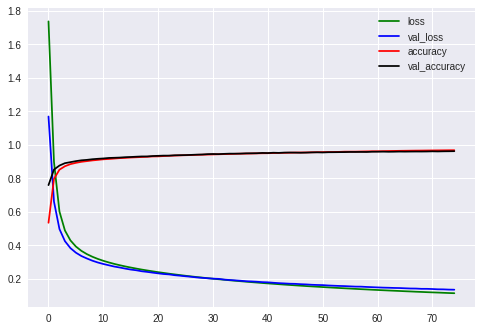

In [35]:
plt.figure(0)
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'b',label='val_loss')
plt.plot(hist.history['acc'],'r',label='accuracy')
plt.plot(hist.history['val_acc'],'black',label='val_accuracy')
plt.legend()
plt.show()

In [27]:
x_train = x_train
output_train = model.predict(x_train)
print (x_train.shape)
print (output_train.shape)

train_pred = []
for i in output_train:
    train_pred.append(i.argmax())

(48000, 784)
(48000, 10)


In [28]:
x_val = x_val
output_val = model.predict(x_val)
print (x_val.shape)
print (output_val.shape)

val_pred = []
for i in output_val:
    val_pred.append(i.argmax())

(12000, 784)
(12000, 10)


In [29]:
x_test = x_test/255.0
output_test = model.predict(x_test)
print (x_test.shape)
print (output_test.shape)

test_pred = []
for i in output_test:
    test_pred.append(i.argmax())

(10000, 784)
(10000, 10)


In [0]:
y1 = []
y2 = []
y3 = []

for i in y_train:
    y1.append(i.argmax())


for i in y_val:
    y2.append(i.argmax())
    

for i in y_test:
    y3.append(i.argmax())

In [0]:
y_train = y1
y_val = y2
y_test = y3

In [32]:
print (train_pred[:10])
print (y_train[:10])

print (val_pred[:10])
print (y_val[:10])

print (test_pred[:10])
print (y_test[:10])

[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
[5, 0, 4, 1, 9, 2, 1, 3, 1, 4]
[4, 7, 8, 8, 5, 6, 6, 8, 2, 2]
[4, 7, 8, 8, 5, 6, 6, 8, 2, 2]
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [0]:
accuracy1 = 0
accuracy2 = 0
accuracy3 = 0

for i in range(len(y_train)):
    if y_train[i] == train_pred[i]:
        accuracy1 += 1

for i in range(len(y_val)):
    if y_val[i] == val_pred[i]:
        accuracy2 += 1
        
for i in range(len(y_test)):
    if y_test[i] == test_pred[i]:
        accuracy3 += 1

In [34]:
print ("Training Accuracy = ", accuracy1/float(len(y_train)))
print ("Validation Accuracy = ", accuracy2/float(len(y_val)))
print ("Testing Accuracy = ", accuracy3/float(len(y_test)))

Training Accuracy =  0.968875
Validation Accuracy =  0.9625
Testing Accuracy =  0.9619
